In [46]:
# Importing packages

import numpy as np
import pandas as pd

## Data Visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots

import folium
import folium.plugins

## Basic data processing and Modelling
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split, ShuffleSplit, cross_val_score, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score, plot_confusion_matrix, roc_auc_score, balanced_accuracy_score, mean_squared_error, r2_score
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.svm import SVC, SVR
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, export_graphviz, plot_tree
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor, GradientBoostingClassifier, GradientBoostingRegressor
from sklearn.neural_network import MLPClassifier, MLPRegressor
from xgboost.sklearn import XGBClassifier, XGBRegressor

## Model Explanatory
import shap  # package used to calculate Shap values
import graphviz
import eli5
from pdpbox import pdp, get_dataset, info_plots

## Settings
pd.set_option('display.max_columns', 500) # Able to display more columns.

In [47]:
# Load the dataset
df = pd.read_csv("/Users/vloggerbhaai/Desktop/Sem 2/DAPA/Group project/Dataset and sources/US_Accidents_Dec20_Updated.csv")
df.info() # show entries, dtypes, memory useage.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2906610 entries, 0 to 2906609
Data columns (total 47 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   ID                     object 
 1   Severity               int64  
 2   Start_Time             object 
 3   End_Time               object 
 4   Start_Lat              float64
 5   Start_Lng              float64
 6   End_Lat                float64
 7   End_Lng                float64
 8   Distance(mi)           float64
 9   Description            object 
 10  Number                 float64
 11  Street                 object 
 12  Side                   object 
 13  City                   object 
 14  County                 object 
 15  State                  object 
 16  Zipcode                object 
 17  Country                object 
 18  Timezone               object 
 19  Airport_Code           object 
 20  Weather_Timestamp      object 
 21  Temperature(F)         float64
 22  Wind_Chill(F)     

In [48]:
df.Severity.value_counts()

2    2129263
3     629452
4     119144
1      28751
Name: Severity, dtype: int64

In [49]:
df.County.value_counts()

Los Angeles            233648
Orange                  81695
Harris                  73142
Miami-Dade              65050
Mecklenburg             59944
                        ...  
Gaines                      1
Harvey                      1
Childress                   1
St John The Baptist         1
Gregory                     1
Name: County, Length: 1729, dtype: int64

In [50]:
df.head(2)

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,Number,Street,Side,City,County,State,Zipcode,Country,Timezone,Airport_Code,Weather_Timestamp,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,2,2019-05-21 08:29:55,2019-05-21 09:29:40,34.808868,-82.269157,34.808868,-82.269157,0.0,Accident on Tanner Rd at Pennbrooke Ln.,439.0,Tanner Rd,R,Greenville,Greenville,SC,29607-6027,US,US/Eastern,KGMU,2019-05-21 08:53:00,76.0,76.0,52.0,28.91,10.0,N,7.0,0.0,Fair,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day
1,A-2,2,2019-10-07 17:43:09,2019-10-07 19:42:50,35.090080,-80.745560,35.090080,-80.745560,0.0,Accident on Houston Branch Rd at Providence Br...,3299.0,Providence Branch Ln,R,Charlotte,Mecklenburg,NC,28270-8560,US,US/Eastern,KEQY,2019-10-07 17:53:00,76.0,76.0,62.0,29.30,10.0,VAR,3.0,0.0,Cloudy,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day


In [51]:
# Dropping Irrelevant columns
irrelavant_columns = ['ID','Description','Country','Weather_Timestamp']
preprocessed_df = df.drop(irrelavant_columns, axis=1)

In [52]:
# Replacing empty data with NaN
preprocessed_df.replace("", float("NaN"), inplace=True)
preprocessed_df.replace(" ", float("NaN"), inplace=True)

# Count missing value(NaN, na, null, None) of each columns, Then transform the result to a pandas dataframe. 
count_missing_value = preprocessed_df.isna().sum() / preprocessed_df.shape[0] * 100
count_missing_value_df = pd.DataFrame(count_missing_value.sort_values(ascending=False), columns=['Missing%'])

Text(0, 0.5, 'Features')

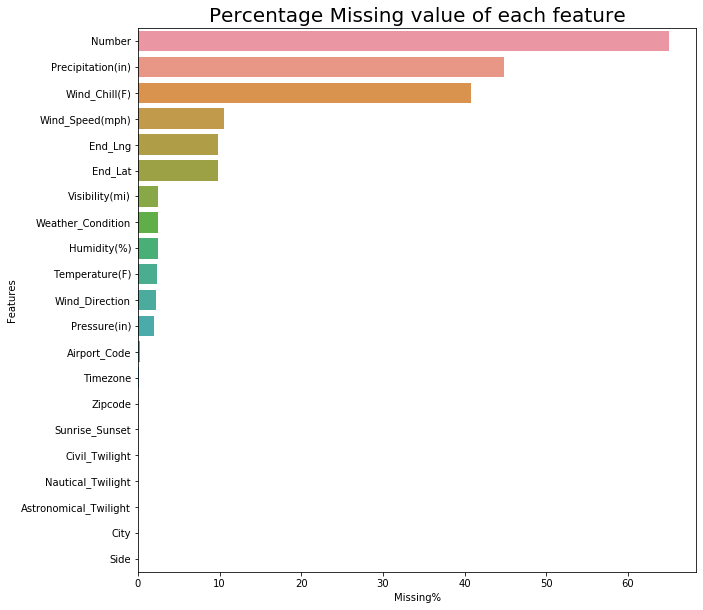

In [53]:
# Visualize the percentage(>0) of Missing value in each column.
missing_value_df = count_missing_value_df[count_missing_value_df['Missing%'] > 0]

plt.figure(figsize=(10, 10)) # Set the figure size
missing_value_graph = sns.barplot(y = missing_value_df.index, x = "Missing%", data=missing_value_df)
missing_value_graph.set_title("Percentage Missing value of each feature", fontsize = 20)
missing_value_graph.set_ylabel("Features")

In [54]:
## Drop the column with Missing value(>40%)
missing_value_40_df = count_missing_value_df[count_missing_value_df['Missing%'] > 40]
preprocessed_df.drop(missing_value_40_df.index, axis=1, inplace=True)
missing_value_40_df

,Missing%
Number,65.081728
Precipitation(in),44.771263
Wind_Chill(F),40.729888


In [55]:
# Convert Time to datetime64[ns]
preprocessed_df['Start_Time'] = pd.to_datetime(preprocessed_df['Start_Time'])
preprocessed_df['End_Time'] = pd.to_datetime(preprocessed_df['End_Time'])

In [56]:
# Categorize the missing value to numerical and categorical for imputation purpose
numerical_missing = ['Wind_Speed(mph)', 'End_Lng', 'End_Lat', 'Visibility(mi)','Humidity(%)', 'Temperature(F)', 'Pressure(in)']
categorical_missing = ['Weather_Condition','Wind_Direction', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight', 'Astronomical_Twilight', 'Side']

In [57]:
# Drop all the instance with NaN/NA/null
data_preprocessed_dropNaN_df = preprocessed_df.dropna()
data_preprocessed_dropNaN_df.reset_index(drop=True, inplace=True)

In [58]:
# Imputation by corresponding class Median value 
data_preprocessed_median_df = data_preprocessed_df.copy()

# For numerical columns
for column_name in numerical_missing:
    data_preprocessed_median_df[column_name] = data_preprocessed_median_df.groupby('Severity')[column_name].transform(lambda x:x.fillna(x.median()))

# # For categorical columns(Majority value imputation)
# https://medium.com/analytics-vidhya/best-way-to-impute-categorical-data-using-groupby-mean-mode-2dc5f5d4e12d
for column_name in categorical_missing:
    data_preprocessed_median_df[column_name] = data_preprocessed_median_df.groupby('Severity')[column_name].transform(lambda x:x.fillna(x.fillna(x.mode().iloc[0])))

# Drop NaN and reset index
data_preprocessed_median_df.dropna(inplace=True)

In [59]:
# Imputation by corresponding class Mean value 
data_preprocessed_mean_df = data_preprocessed_df.copy()

# For numerical columns
for column_name in numerical_missing:
    data_preprocessed_mean_df[column_name] = data_preprocessed_mean_df.groupby('Severity')[column_name].transform(lambda x:x.fillna(x.mean()))

# For categorical columns(Majority value imputation)
for column_name in categorical_missing:
    data_preprocessed_mean_df[column_name] = data_preprocessed_mean_df.groupby('Severity')[column_name].transform(lambda x:x.fillna(x.fillna(x.mode().iloc[0])))
    
# Drop NaN 
data_preprocessed_mean_df.dropna(inplace=True)

In [60]:
## Only choose a city because of the resources limitation.
data_best_df = data_preprocessed_dropNaN_df[data_preprocessed_dropNaN_df['City'] == 'Orlando'].copy()
#data_best_df = data_preprocessed_median_df[data_preprocessed_dropNaN_df['City'] == 'Orlando'].copy()
#data_best_df = data_preprocessed_mean_df[data_preprocessed_dropNaN_df['City'] == 'Orlando'].copy()

# Reset index
data_best_df.reset_index(inplace=True)

In [61]:
# Choose relevant features
relevant_features = ['Severity', 'Start_Time', 'End_Time', 'Start_Lat', 'Start_Lng','Side',
       'Temperature(F)', 'Humidity(%)', 'Pressure(in)', 'Visibility(mi)',
       'Wind_Direction', 'Wind_Speed(mph)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset']
data_modelling_df = data_best_df[relevant_features].copy()

In [62]:
# Duration = End_Time - Start_Time; Create a new feature for modeling.
data_modelling_df['Duration'] = (data_modelling_df['End_Time'] - data_modelling_df['Start_Time']).dt.total_seconds() / 3600
data_modelling_df.drop('End_Time', axis=1, inplace=True)

In [63]:
# Transform Month/week/Hour to different features
data_modelling_df["Month"] = data_modelling_df["Start_Time"].dt.month
data_modelling_df["Week"] = data_modelling_df["Start_Time"].dt.dayofweek
data_modelling_df["Hour"] = data_modelling_df["Start_Time"].dt.hour
data_modelling_df.drop("Start_Time", axis=1, inplace=True)

In [64]:
# Select features that are suitable for One Hot Encoding
one_hot_features = ['Wind_Direction', 'Weather_Condition']

# Wind_Direction Categorizing
data_modelling_df.loc[data_modelling_df['Wind_Direction'].str.startswith('C'), 'Wind_Direction'] = 'C' #Calm
data_modelling_df.loc[data_modelling_df['Wind_Direction'].str.startswith('E'), 'Wind_Direction'] = 'E' #East, ESE, ENE
data_modelling_df.loc[data_modelling_df['Wind_Direction'].str.startswith('W'), 'Wind_Direction'] = 'W' #West, WSW, WNW
data_modelling_df.loc[data_modelling_df['Wind_Direction'].str.startswith('S'), 'Wind_Direction'] = 'S' #South, SSW, SSE
data_modelling_df.loc[data_modelling_df['Wind_Direction'].str.startswith('N'), 'Wind_Direction'] = 'N' #North, NNW, NNE
data_modelling_df.loc[data_modelling_df['Wind_Direction'].str.startswith('V'), 'Wind_Direction'] = 'V' #Variable

In [65]:
# Weather_Condition Categorizing
# Fair, Cloudy, Clear, Overcast, Snow, Haze, Rain, Thunderstorm, Windy, Hail, Thunder, Dust, Tornado
data_modelling_df['Weather_Fair'] = np.where(data_modelling_df['Weather_Condition'].str.contains('Fair', case=False, na = False), 1, 0)
data_modelling_df['Weather_Cloudy'] = np.where(data_modelling_df['Weather_Condition'].str.contains('Cloudy', case=False, na = False), 1, 0)
data_modelling_df['Weather_Clear'] = np.where(data_modelling_df['Weather_Condition'].str.contains('Clear', case=False, na = False), 1, 0)
data_modelling_df['Weather_Overcast'] = np.where(data_modelling_df['Weather_Condition'].str.contains('Overcast', case=False, na = False), 1, 0)
data_modelling_df['Weather_Snow'] = np.where(data_modelling_df['Weather_Condition'].str.contains('Snow|Wintry|Sleet', case=False, na = False), 1, 0)
data_modelling_df['Weather_Haze'] = np.where(data_modelling_df['Weather_Condition'].str.contains('Smoke|Fog|Mist|Haze', case=False, na = False), 1, 0)
data_modelling_df['Weather_Rain'] = np.where(data_modelling_df['Weather_Condition'].str.contains('Rain|Drizzle|Showers', case=False, na = False), 1, 0)
data_modelling_df['Weather_Thunderstorm'] = np.where(data_modelling_df['Weather_Condition'].str.contains('Thunderstorms|T-Storm', case=False, na = False), 1, 0)
data_modelling_df['Weather_Windy'] = np.where(data_modelling_df['Weather_Condition'].str.contains('Windy|Squalls', case=False, na = False), 1, 0)
data_modelling_df['Weather_Hail'] = np.where(data_modelling_df['Weather_Condition'].str.contains('Hail|Ice Pellets', case=False, na = False), 1, 0)
data_modelling_df['Weather_Thunder'] = np.where(data_modelling_df['Weather_Condition'].str.contains('Thunder', case=False, na = False), 1, 0)
data_modelling_df['Weather_Dust'] = np.where(data_modelling_df['Weather_Condition'].str.contains('Dust', case=False, na = False), 1, 0)
data_modelling_df['Weather_Tornado'] = np.where(data_modelling_df['Weather_Condition'].str.contains('Tornado', case=False, na = False), 1, 0)

In [66]:
# Transform the one-hot features, then delete them
onehot_df = pd.get_dummies(data_modelling_df['Wind_Direction'], prefix='Wind')
data_modelling_df = pd.concat([data_modelling_df, onehot_df], axis=1)
data_modelling_df.drop(one_hot_features, axis=1, inplace=True)

In [67]:
# Select features that are suitable for Label Encoding
label_encoding_features = ['Side', 'Amenity','Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway','Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal','Turning_Loop', 'Sunrise_Sunset']

# Label Encoding
for feature in label_encoding_features:
    data_modelling_df[feature] = LabelEncoder().fit_transform(data_modelling_df[feature])

In [68]:
data_modelling_df

,Severity,Start_Lat,Start_Lng,Side,Temperature(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Duration,Month,Week,Hour,Weather_Fair,Weather_Cloudy,Weather_Clear,Weather_Overcast,Weather_Snow,Weather_Haze,Weather_Rain,Weather_Thunderstorm,Weather_Windy,Weather_Hail,Weather_Thunder,Weather_Dust,Weather_Tornado,Wind_C,Wind_E,Wind_N,Wind_S,Wind_V,Wind_W
0,2,28.348536,-81.564980,1,64.0,84.0,30.08,10.0,3.5,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0.491389,4,4,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1,1,28.371450,-81.404380,0,66.0,90.0,30.17,10.0,3.0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0.582778,3,3,7,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
2,2,28.480616,-81.310112,0,72.0,87.0,30.13,10.0,4.6,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0.745556,11,2,8,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,2,28.548094,-81.260651,1,86.0,70.0,29.87,10.0,9.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.767778,9,0,10,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,2,28.635424,-81.448527,1,79.0,54.0,29.90,10.0,9.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,10.166667,10,3,10,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23988,2,28.441730,-81.429070,1,78.0,87.0,29.98,10.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.495833,6,3,7,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
23989,2,28.568463,-81.253216,1,48.0,63.0,30.01,10.0,7.0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,3.255833,12,1,9,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
23990,2,28.386574,-81.480545,1,89.1,67.0,29.99,10.0,12.7,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0.993889,8,0,17,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
23991,2,28.618528,-81.394241,0,79.0,84.0,30.13,10.0,3.5,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0.500000,8,1,7,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [69]:
# Display the correlation table for continuous features
# https://pandas.pydata.org/pandas-docs/stable/user_guide/style.html
def style_corr(v, props=''):
    return props if (v < -0.4 or v > 0.4) and v != 1 else None

continuous_feature = ['Start_Lat', 'Start_Lng', 'Temperature(F)','Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Speed(mph)', 'Duration']
data_modelling_df[continuous_feature].corr().style.applymap(style_corr, props='color:red;')

,Start_Lat,Start_Lng,Temperature(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Duration
Start_Lat,1.000000,-0.052315,-0.052779,-0.018169,-0.158080,-0.038082,0.000298,0.018861
Start_Lng,-0.052315,1.000000,0.007788,0.014150,-0.025802,-0.000252,-0.017223,-0.030250
Temperature(F),-0.052779,0.007788,1.000000,-0.204853,-0.277554,0.049595,0.160132,-0.005737
Humidity(%),-0.018169,0.014150,-0.204853,1.000000,-0.149238,-0.242684,-0.298637,-0.166201
Pressure(in),-0.158080,-0.025802,-0.277554,-0.149238,1.000000,0.077722,-0.100827,-0.031088
Visibility(mi),-0.038082,-0.000252,0.049595,-0.242684,0.077722,1.000000,-0.047763,0.034254
Wind_Speed(mph),0.000298,-0.017223,0.160132,-0.298637,-0.100827,-0.047763,1.000000,0.142423
Duration,0.018861,-0.030250,-0.005737,-0.166201,-0.031088,0.034254,0.142423,1.000000


Text(0.5, 1, 'Pearson Correlation for continuous features')

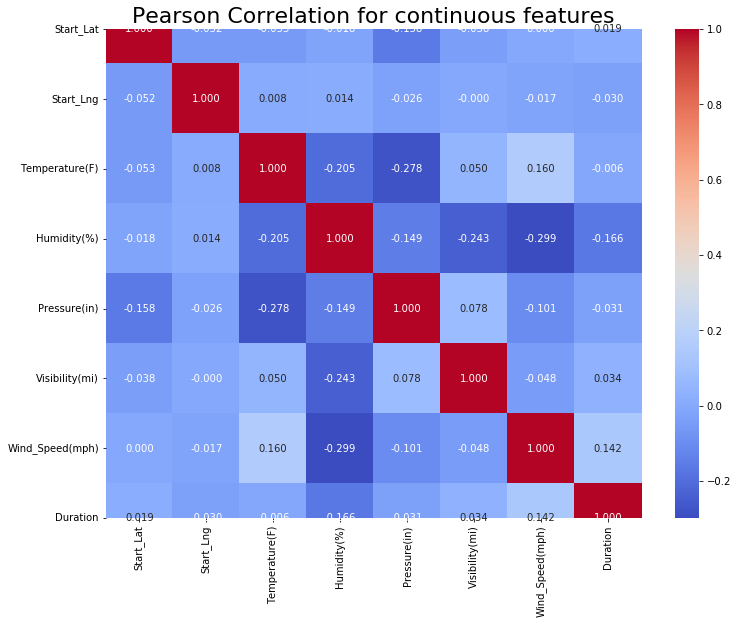

In [70]:
# Show the heatmap
plt.figure(figsize=(12,9))
sns.heatmap(data_modelling_df[continuous_feature].corr(), cmap="coolwarm", annot = True, fmt='.3f').set_title('Pearson Correlation for continuous features', fontsize=22)

In [71]:
# Find the data with all the same value
unique_counts = data_modelling_df.drop(continuous_feature, axis=1).astype("object").describe().loc['unique']
feature_all_same = list(unique_counts[unique_counts == 1].index)
data_modelling_df.drop(feature_all_same, axis=1, inplace=True)

In [72]:
# Display the correlation table for categorical features
data_modelling_df.drop(continuous_feature, axis=1).corr(method='spearman').style.applymap(style_corr, props='color:red;')

,Severity,Side,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Sunrise_Sunset,Month,Week,Hour,Weather_Fair,Weather_Cloudy,Weather_Clear,Weather_Overcast,Weather_Snow,Weather_Haze,Weather_Rain,Weather_Thunderstorm,Weather_Windy,Weather_Thunder,Weather_Dust,Wind_C,Wind_E,Wind_N,Wind_S,Wind_V,Wind_W
Severity,1.000000,0.136993,-0.019924,-0.001970,-0.239514,-0.001970,0.079685,-0.009657,-0.008601,-0.004406,-0.061029,-0.017931,-0.004406,-0.202969,0.035465,-0.111306,0.049288,-0.005773,-0.087286,-0.037037,0.085333,0.050421,0.019357,-0.000690,0.023269,0.025065,-0.028456,0.037761,-0.003413,-0.025403,-0.002061,-0.012771,0.026538,0.005763,0.000484
Side,0.136993,1.000000,-0.023421,0.003695,-0.087448,0.003695,0.095873,-0.012473,0.007379,0.008263,-0.080375,-0.032217,0.001565,-0.012326,0.045721,-0.104480,-0.002744,-0.014358,-0.048696,-0.027078,0.044009,0.020500,0.006400,-0.005584,0.014960,0.017239,-0.036420,0.034586,0.006400,-0.007349,-0.028503,-0.012945,0.027526,0.011772,0.020309
Amenity,-0.019924,-0.023421,1.000000,-0.000403,0.053082,-0.000403,-0.007238,-0.001974,-0.004404,0.045568,0.046837,0.042888,-0.000901,0.028366,-0.011136,-0.000162,-0.007885,-0.006872,0.008268,-0.007966,0.002586,-0.001737,-0.000698,-0.005573,-0.004962,-0.006427,0.000363,-0.008798,-0.000698,-0.005366,-0.006843,-0.003639,0.019289,0.000480,-0.007510
Bump,-0.001970,0.003695,-0.000403,1.000000,-0.005481,-0.000042,-0.001151,-0.000204,-0.000456,-0.000093,-0.001555,-0.000625,0.447176,-0.004571,0.010229,0.005327,-0.009389,-0.008239,-0.003968,0.007977,-0.002676,-0.001275,-0.000072,-0.000577,-0.001663,-0.000665,-0.000654,-0.000911,-0.000072,-0.001500,-0.003860,0.009712,-0.003574,-0.001153,-0.002309
Crossing,-0.239514,-0.087448,0.053082,-0.005481,1.000000,-0.005481,-0.148415,-0.000141,0.080753,-0.006405,0.093782,0.061265,0.011153,0.734403,0.002248,-0.047061,-0.046956,-0.005379,0.046439,-0.035519,0.004874,-0.005512,-0.009494,-0.008183,-0.020065,-0.006261,-0.005224,-0.028730,-0.009494,0.021538,-0.011096,-0.024365,0.019256,0.014247,0.002352
Give_Way,-0.001970,0.003695,-0.000403,-0.000042,-0.005481,1.000000,-0.001151,-0.000204,-0.000456,-0.000093,-0.001555,0.066654,-0.000093,-0.004571,-0.004075,0.002224,-0.005406,-0.003833,-0.003968,0.007977,-0.002676,-0.001275,-0.000072,-0.000577,-0.001663,-0.000665,-0.000654,-0.000911,-0.000072,-0.001500,0.010797,-0.004292,-0.003574,-0.001153,-0.002309
Junction,0.079685,0.095873,-0.007238,-0.001151,-0.148415,-0.001151,1.000000,-0.005641,-0.012586,0.080987,-0.042945,-0.014753,-0.002574,-0.123667,0.012548,-0.033710,0.004963,-0.013574,-0.013863,-0.014050,0.016124,0.010466,-0.001994,0.000402,0.014994,0.005296,-0.013261,0.018464,-0.001994,-0.011877,0.007323,0.006029,-0.003044,-0.009551,-0.001399
No_Exit,-0.009657,-0.012473,-0.001974,-0.000204,-0.000141,-0.000204,-0.005641,1.000000,-0.002234,-0.000457,-0.007623,-0.003065,-0.000457,-0.000040,0.000476,-0.001604,0.002022,-0.003752,0.007149,-0.004041,-0.005662,0.000685,-0.000354,-0.002827,-0.008151,-0.003260,-0.003207,-0.004463,-0.000354,0.010590,0.002033,-0.003876,-0.001959,0.001963,-0.003005
Railway,-0.008601,0.007379,-0.004404,-0.000456,0.080753,-0.000456,-0.012586,-0.002234,1.000000,-0.001019,0.037712,0.036441,-0.001019,0.009136,0.010647,0.011761,0.005819,-0.000566,0.027090,-0.006185,-0.012493,-0.001463,-0.000790,-0.006308,-0.003451,0.004366,-0.007156,-0.005668,-0.000790,0.005125,-0.003153,0.007117,-0.002679,-0.002331,-0.004678
Roundabout,-0.004406,0.008263,0.045568,-0.000093,-0.006405,-0.000093,0.080987,-0.000457,-0.001019,1.000000,-0.003478,0.028693,-0.000208,-0.010222,-0.002715,0.006285,-0.007230,0.008415,0.004071,-0.005780,0.002178,-0.002852,-0.000161,-0.001290,-0.003719,-0.001487,-0.001463,-0.002036,-0.000161,-0.003355,-0.002077,-0.003334,-0.001178,0.014100,0.003940


Text(0.5, 1, 'Spearman Correlation for categorical features')

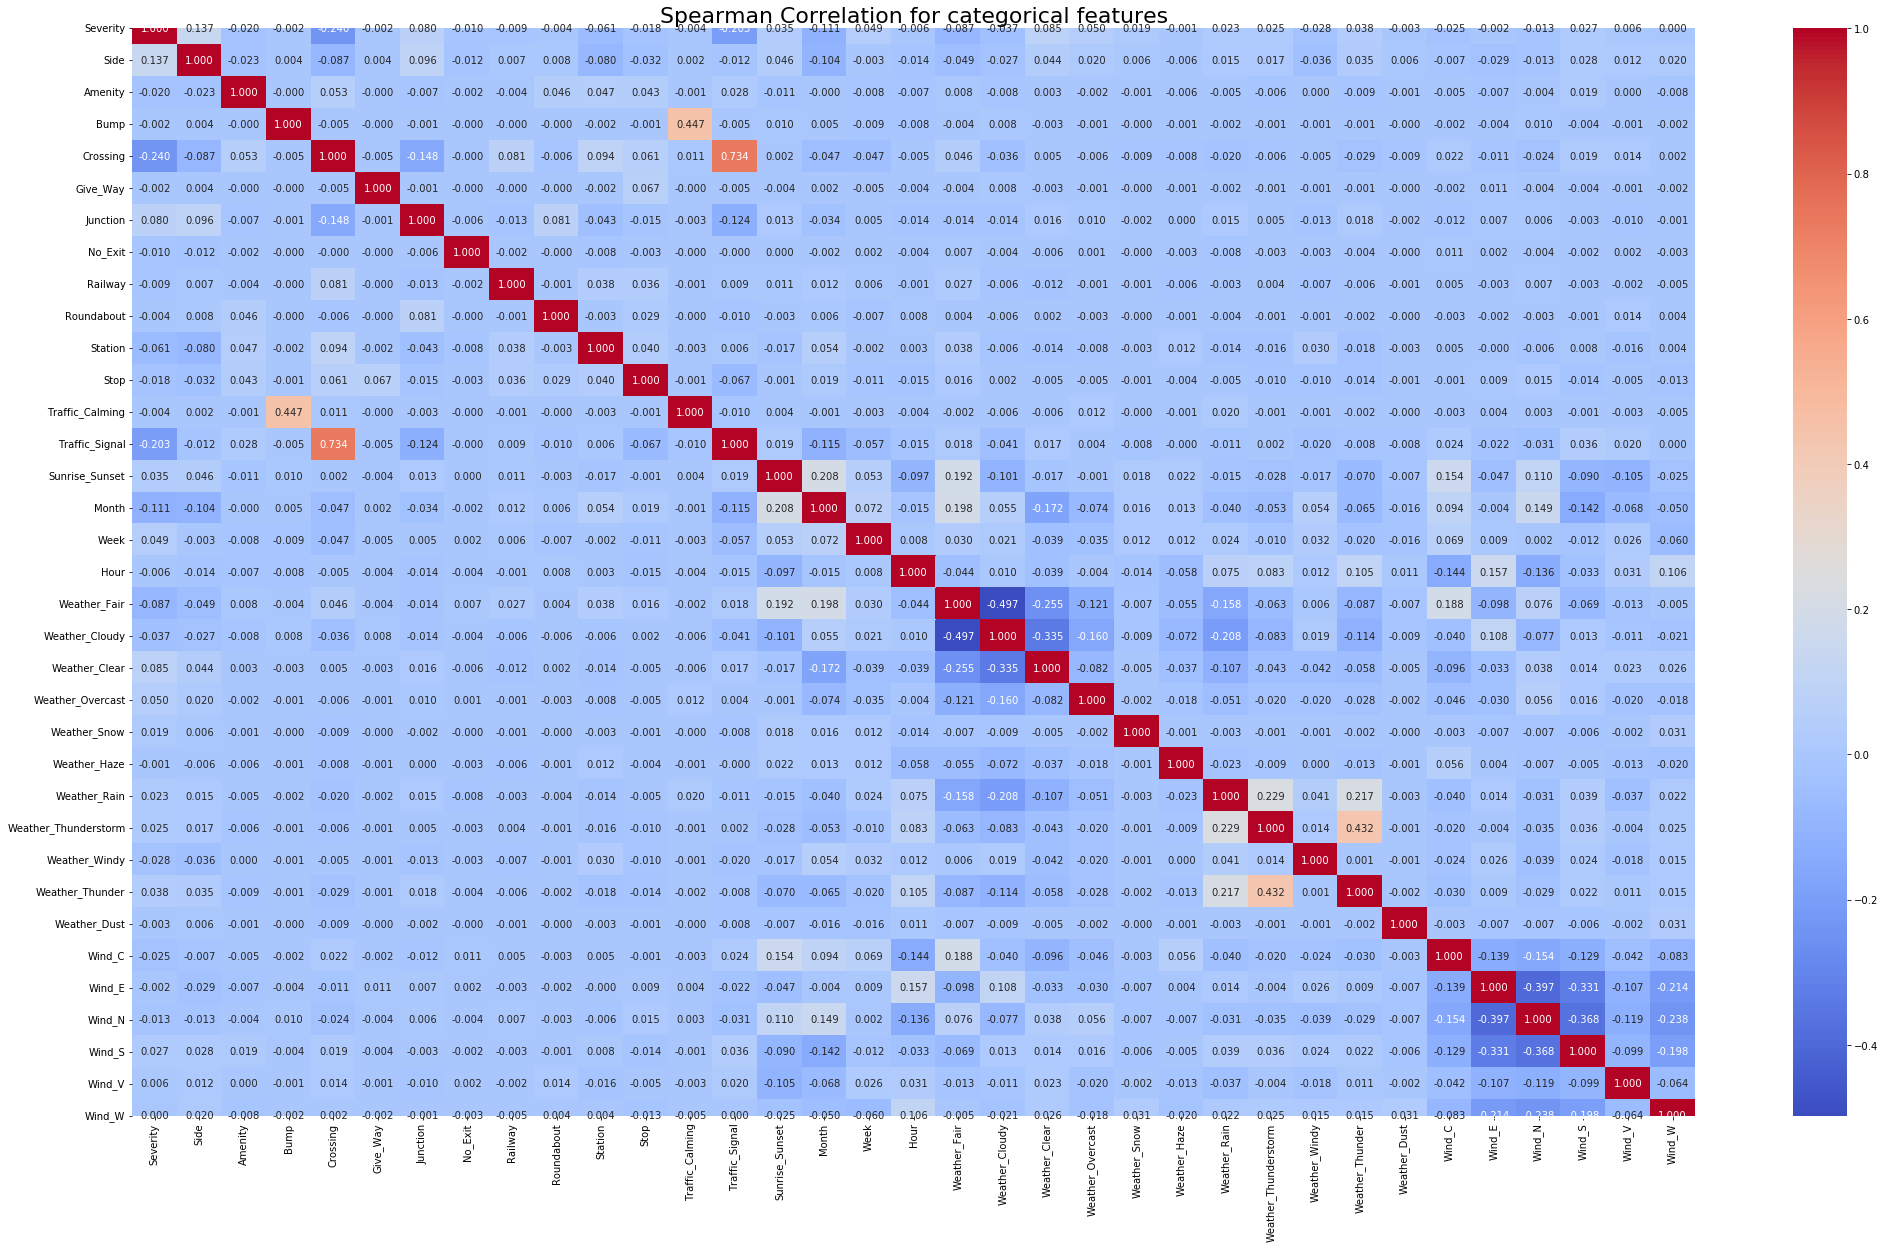

In [73]:
# Show the heatmap
plt.figure(figsize=(35,20))
sns.heatmap(data_modelling_df.drop(continuous_feature, axis=1).corr(method='spearman'), cmap="coolwarm", annot = True, fmt='.3f').set_title('Spearman Correlation for categorical features', fontsize=22)

In [74]:
# Train/Test Split
X_reg = data_modelling_df.drop(["Severity", "Duration"], axis=1)
Y_reg = data_modelling_df.Duration
x_train_reg, x_test_reg, y_train_reg, y_test_reg = train_test_split(X_reg, Y_reg, test_size = 0.3, random_state=0)
print(f'Train Reg: {x_train_reg.shape} \n Test Reg: {x_test_reg.shape}')
reg_feature_names = x_train_reg.columns.tolist()

Train Reg: (16795, 41) 
 Test Reg: (7198, 41)


In [75]:
# defining function to return adjusted r square
def adj_r2(test_data, r2_score):
    records_num = test_data.shape[0]
    feature_num = test_data.shape[1]
    adj_r2_score = 1 - ((records_num - 1) / (records_num - feature_num - 1) * (1 - r2_score))
    return adj_r2_score

# Model building

In [76]:
# Train/Test Split
X_cla = data_modelling_df.drop("Severity", axis=1)
Y_cla = data_modelling_df.Severity
x_train_cla, x_test_cla, y_train_cla, y_test_cla = train_test_split(X_cla, Y_cla, test_size = 0.3, random_state=0, stratify=Y_cla)
print(f'Train Cla: {x_train_cla.shape} \n Test Cla: {x_test_cla.shape}')
cla_feature_names = x_train_cla.columns.tolist()

Train Cla: (16795, 42) 
 Test Cla: (7198, 42)


In [77]:
# defining function to plot confusion matrix

def draw_confusion_matrix(classifier):
    fig, ax = plt.subplots(figsize=(12, 6))
    plot_confusion_matrix(classifier, x_test_cla, y_test_cla, cmap=plt.cm.Blues, normalize=None, ax=ax)
    ax.set_title("Confusion Matrix", fontsize = 15)
    plt.show()

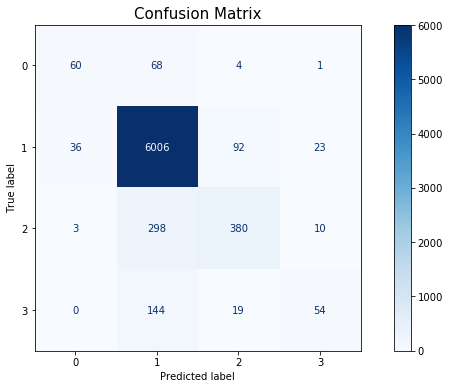

              precision    recall  f1-score   support

           0       0.61      0.45      0.52       133
           1       0.92      0.98      0.95      6157
           2       0.77      0.55      0.64       691
           3       0.61      0.25      0.35       217

    accuracy                           0.90      7198
   macro avg       0.73      0.56      0.61      7198
weighted avg       0.89      0.90      0.89      7198

balanced_accuracy: 0.556344613985783
roc_ovo_macro: 0.9092460613043337
roc_ovr_weighted: 0.9230708895432526


Weight,Feature
0.2612,Crossing
0.0475,Side
0.0451,Duration
0.0408,Railway
0.0366,Month
0.0352,Traffic_Signal
0.0311,Stop
0.0299,Start_Lng
0.0283,Sunrise_Sunset
0.0267,Weather_Haze


In [78]:
# XGB Classification
#error resolution
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_train_cla = le.fit_transform( y_train_cla)
y_test_cla = le.fit_transform( y_test_cla)
#error resolution
xgb_cla = XGBClassifier(learning_rate=0.3, max_depth=20, n_estimators=100, eval_metric='mlogloss', random_state=0)
xgb_cla.fit(x_train_cla, y_train_cla)
xgb_cla_predictions = xgb_cla.predict(x_test_cla)
xgb_cla_results = classification_report(y_test_cla, xgb_cla_predictions, zero_division=True, output_dict=True)

# Confusion matrix and Classification report
draw_confusion_matrix(xgb_cla)
print(classification_report(y_test_cla, xgb_cla_predictions, zero_division=True))

# balanced_accuracy
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.balanced_accuracy_score.html#sklearn.metrics.balanced_accuracy_score
xgb_cla_balanced_accuracy = balanced_accuracy_score(y_test_cla, xgb_cla_predictions)
print(f'balanced_accuracy: {xgb_cla_balanced_accuracy}')

# ROC_AUC score
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html#sklearn.metrics.roc_auc_score
xgb_cla_roc_ovo_macro = roc_auc_score(y_test_cla, xgb_cla.predict_proba(x_test_cla), multi_class='ovo', average='macro') #Insensitive to class imbalance when average == 'macro'
xgb_cla_roc_ovr_weighted = roc_auc_score(y_test_cla, xgb_cla.predict_proba(x_test_cla), multi_class='ovr', average='weighted') #Sensitive to class imbalance even when average == 'macro'
print(f"roc_ovo_macro: {xgb_cla_roc_ovo_macro}") 
print(f"roc_ovr_weighted: {xgb_cla_roc_ovr_weighted}")
# Show feature importance as a table
eli5.show_weights(xgb_cla, feature_names = cla_feature_names)